In [1]:
import pandas as pd
import numpy as np
import mibian
import yfinance as yf

## Ticker Data

In [2]:
#get data on this ticker
tickerData = yf.Ticker("SPY")

#get the historical prices for this ticker
tickerDf = tickerData.history(period="max")

#see your data
tickerDf["returns"] = tickerDf["Close"].pct_change()

## Initial Simulation

In [3]:
mu = np.mean(tickerDf["returns"])
sigma = np.std(tickerDf["returns"])
days_of = 857
start_price = 420

returns = np.random.normal(loc=mu, scale=sigma, size=days_of)
price = start_price*(1+returns).cumprod()

In [6]:
forward = [mibian.BS([price[-d], 210, 0.01, d], volatility=21.63).callPrice for d in range(days_of,0,-1)]
days = [d for d in range(0,days_of,1)]

In [7]:
returns = pd.DataFrame({"Underlying Price": price, "LEAP Price": forward, "Days": days})
returns["LEAP PL"], returns["BnH PL"] = (returns["LEAP Price"] - returns["LEAP Price"][0])*100, (returns["Underlying Price"] - returns["Underlying Price"][0])*100
returns["LEAP Returns(%)"] , returns["BnH Returns(%)"] = (returns["LEAP PL"]/(returns["LEAP Price"][0]*100))*100, (returns["BnH PL"]/(returns["Underlying Price"][0]*100))*100

In [8]:
import plotly.express as px

fig = px.line(returns,x="Days", y=["LEAP Returns(%)", "BnH Returns(%)"], labels={"value":"Profit/Loss (%)", "variable":"Strategy"})
fig.show()

In [57]:
returns["Ext Value"] = ((210+returns["LEAP Price"]) - returns["Underlying Price"])*100

In [58]:
px.line(returns, x="Days", y="Ext Value")

## Multiple Simulation

In [4]:
sim = []

for i in range(0,1000):
    price = start_price*(1+(np.random.normal(loc=mu, scale=sigma, size=days_of))).cumprod()
    LEAP_val = (mibian.BS([price[-1], 210, 0.01, 1], volatility=21.63).callPrice - mibian.BS([price[0], 210, 0.01, days_of], volatility=21.63).callPrice)/ mibian.BS([price[0], 210, 0.01, days_of], volatility=21.63).callPrice
    BnH_val = (price[-1] - price[0] )/ price[0]
    diff = LEAP_val - BnH_val
    sim.append(diff)

In [68]:
fig = px.histogram(sim, nbins=100, title="Histogram of Return Differences (%)", labels={"value":"Differences in % returns"})
fig.update_layout(showlegend=False).update_yaxes(visible=False, showticklabels=False).update_xaxes(nticks=20)
fig.show()

### Matplotlib Plotting

In [24]:
import matplotlib.pyplot as plt

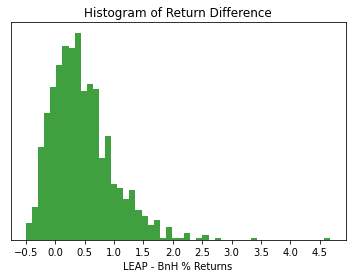

In [61]:
fig, ax = plt.subplots()

n, bins, patches = plt.hist(sim, facecolor="g", alpha=0.75, bins=50)
plt.xlabel("LEAP - BnH % Returns")
ax.set_title("Histogram of Return Difference")
ax.get_yaxis().set_visible(False)
plt.xticks(ticks=np.arange(-0.5,5,0.5))
plt.show()

## Bear Market Returns

In [70]:
bear_day = returns

In [71]:
bear_day

,Underlying Price,LEAP Price,Days,LEAP PL,BnH PL,LEAP Returns(%),BnH Returns(%)
0,422.805055,213.465274,0,0.000000,0.000000,0.000000,0.000000
1,421.125134,211.802206,1,-166.306767,-167.992034,-0.779081,-0.397327
2,429.020837,219.609780,2,614.450629,621.578259,2.878457,1.470130
3,432.878792,223.428145,3,996.287049,1007.373746,4.667209,2.382596
4,422.320352,212.976110,4,-48.916378,-48.470240,-0.229154,-0.114640
...,...,...,...,...,...,...,...
852,295.174564,85.174852,852,-12829.042195,-12763.049028,-60.098966,-30.186605
853,292.632194,82.632424,853,-13083.284978,-13017.286058,-61.289992,-30.787915
854,298.132999,88.133171,854,-12533.210282,-12467.205608,-58.713111,-29.486889
855,291.381856,81.381971,855,-13208.330285,-13142.319858,-61.875780,-31.083639


In [77]:
mu = np.mean(tickerDf["returns"])
sigma = np.std(tickerDf["returns"])
days_of = 857
start_price = 287

returns = np.random.normal(loc=mu, scale=sigma, size=days_of)
price = start_price*(1+returns).cumprod()

forward = [mibian.BS([price[-d], 145, 0.01, d], volatility=21.63).callPrice for d in range(days_of,0,-1)]
days = [d for d in range(0,days_of,1)]

In [78]:
bear_day_2 = pd.DataFrame({"Underlying Price": price, "LEAP Price": forward, "Days": days})

In [89]:
bear_day["Roll_LEAP"] = bear_day["LEAP Price"]

In [83]:
bear_day_2["Roll_LEAP"] = bear_day_2["LEAP Price"] - bear_day["LEAP Price"].iloc[-1]

In [88]:
pd.concat([bear_day, bear_day_2]).reset_index()

,index,Underlying Price,LEAP Price,Days,LEAP PL,BnH PL,LEAP Returns(%),BnH Returns(%),Roll LEAP,Roll_LEAP
0,0,422.805055,213.465274,0,0.000000,0.000000,0.000000,0.000000,213.465274,NaN
1,1,421.125134,211.802206,1,-166.306767,-167.992034,-0.779081,-0.397327,211.802206,NaN
2,2,429.020837,219.609780,2,614.450629,621.578259,2.878457,1.470130,219.609780,NaN
3,3,432.878792,223.428145,3,996.287049,1007.373746,4.667209,2.382596,223.428145,NaN
4,4,422.320352,212.976110,4,-48.916378,-48.470240,-0.229154,-0.114640,212.976110,NaN
...,...,...,...,...,...,...,...,...,...,...
1709,852,417.255660,272.255859,852,NaN,NaN,NaN,NaN,NaN,194.258111
1710,853,418.791579,273.791738,853,NaN,NaN,NaN,NaN,NaN,195.793990
1711,854,424.880859,279.880978,854,NaN,NaN,NaN,NaN,NaN,201.883230
1712,855,429.820430,284.820509,855,NaN,NaN,NaN,NaN,NaN,206.822761
